# Import libraries

In [176]:
from utils import generate_samples_linear_reg
import numpy as np
import statsmodels.api as sm
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics import tsaplots
from statsmodels.stats.outliers_influence import variance_inflation_factor
import scipy.stats as stats

# Generate sample

In [178]:
# Sample data from population which is linearly distributed

samples = 50
features = 13
lower_bound = 0
upper_bound = 5
intercept = 10
coeffecients = [20,10,13,45,4,-89,-12,-7,9,280,-500,130,1000]
sigma = 40

X, y = generate_samples_linear_reg(
    samples,
    features,
    lower_bound,
    upper_bound,
    intercept,
    coeffecients,
    sigma
)

print("Shape of samples is: ",X.shape)
# print("Samples are: ", X)

print("\n Shape of labels is: ",y.shape)
# print("Labels are: ", y)



Shape of samples is:  (50, 13)

 Shape of labels is:  (50,)


In [179]:
# Plot of samples - To verify linearity assumption

# plt.scatter(X,y)
# plt.xlabel("Feature")
# plt.ylabel("Label")
# plt.show()


# Train model

In [180]:
# Train linear regression model

X_with_intercept = sm.add_constant(X)
model = sm.OLS(y,X_with_intercept)
model_results = model.fit()
model_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     3321.
Date:                Sun, 21 Apr 2024   Prob (F-statistic):           2.55e-51
Time:                        11:05:20   Log-Likelihood:                -258.47
No. Observations:                  50   AIC:                             544.9
Df Residuals:                      36   BIC:                             571.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         90.1512     51.604      1.747      0.089     -14.507     194.810
x1            18.3926      4.815      3.820      0.001       8.627      28.158
x2             5.9541      5.800      1.027      0.311      -5.809      17.717
x3             8.3495      5.182      1.611      0.116      -2.160      18.859
x4            44.6591      5.164      8.648      0.000      34.186      55.133
x5            -1.7773      5.716     -0.311      0.758     -13.370       9.816
x6           -92.9825      5.733    -16.220      0.000    -104.609     -81.356
x7           -18.4715      5.901     -3.130      0.003     -30.439      -6.504
x8            -6.0314      6.135     -0.983      0.332     -18.474       6.411
x9             6.3299      5.282      1.198      0.239      -4.383      17.042
x10          279.2546      5.306     52.626      0.000     268.493     290.016
x11         -510.8420      5.899    -86.603      0.000    -522.805    -498.879
x12          132.9494      5.862     22.679      0.000     121.060     144.838
x13         1002.9151      5.640    177.820      0.000     991.477    1014.354
==============================================================================
Omnibus:                        8.339   Durbin-Watson:                   1.636
Prob(Omnibus):                  0.015   Jarque-Bera (JB):                7.606
Skew:                           0.776   Prob(JB):                       0.0223
Kurtosis:                       4.114   Cond. No.                         70.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Prediction

In [181]:
# Predictions

y_pred = model_results.predict(X_with_intercept)
mean_squared_error = np.mean((y - y_pred) ** 2)
print("Mean squared error is: ",mean_squared_error)
print("Estimated standard deviation in errors is (Square root of mean squared error of fitted model): ",
      np.sqrt(len(y)*mean_squared_error/(len(y)-X.shape[1]-1)))
print("Actual standard deviation in errors is: ", sigma)

# Plot of actual and predicted labels

# plt.scatter(X,y,color='r',label='Actual')
# plt.plot(X,y_pred,color='g',label='Predicted')
# plt.xlabel("Feature")
# plt.ylabel("Label")
# plt.title("Prediction vs Actual plot")
# plt.legend()
# plt.show()


Mean squared error is:  1809.4036657779832
Estimated standard deviation in errors is (Square root of mean squared error of fitted model):  50.13043633276959
Actual standard deviation in errors is:  40


# Diagnostic plots

In [182]:
# Get leverage points and influence points in sample. These will be used to plot graphs.
# Leverage points - These are points (X) than are far away from mean (X_mean)
# Influence points - These are the points (X) which have large influence on the fit of the model.

influence = model_results.get_influence() 
leverage = influence.hat_matrix_diag 

Min error is:  -77.88749780979697
Max error is:  134.8742181160269
Mean of errors is:  0.0


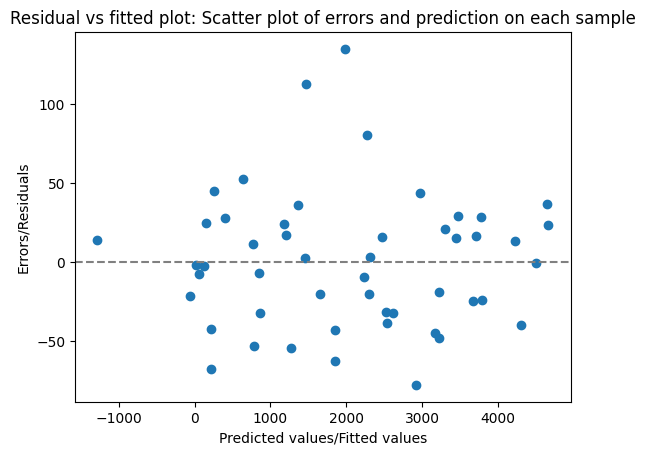

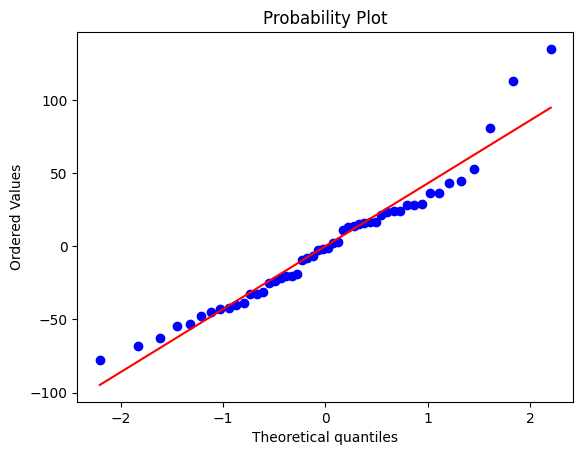

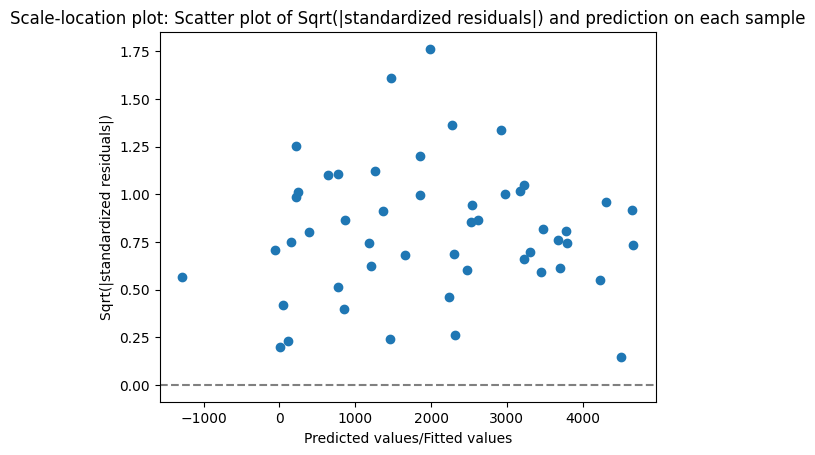

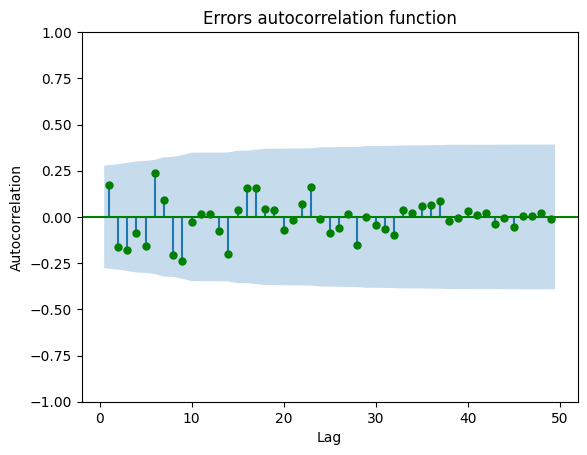

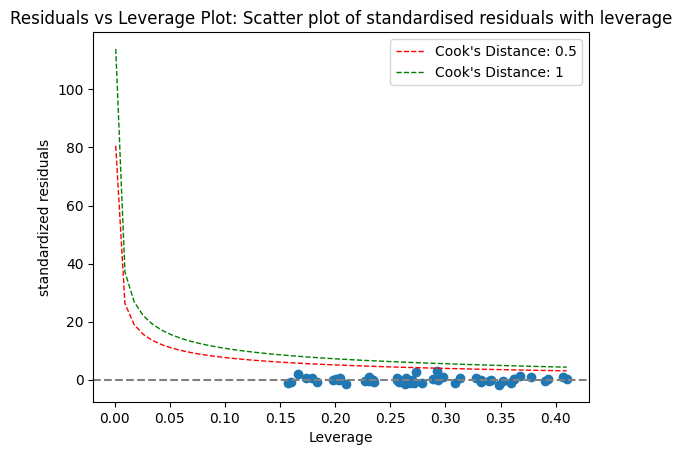

<Figure size 1200x1200 with 0 Axes>

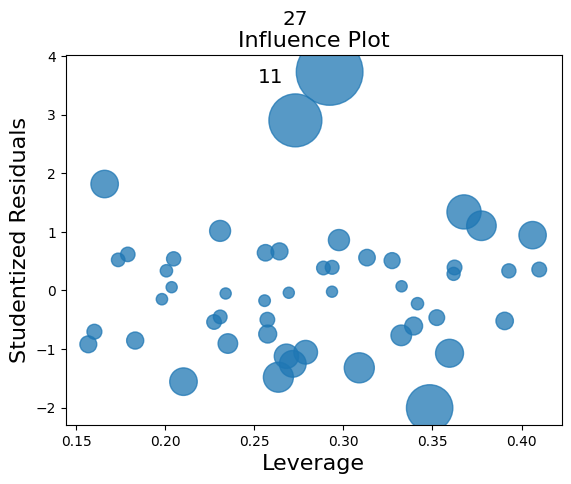

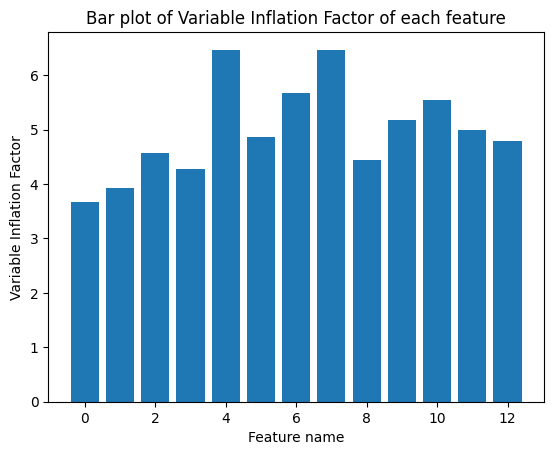

In [183]:
# Plot of errors

errors = y-y_pred
errors_standardized = (errors-np.mean(errors))/np.std(errors,ddof=2)
errors_standardized_abs_sqrt = np.sqrt(np.absolute((errors-np.mean(errors)))/np.std(errors,ddof=2))

# Error Statistics - To check mean of errors

print("Min error is: ",np.min(errors))
print("Max error is: ",np.max(errors))
print("Mean of errors is: ",round(np.mean(errors),2))

# Residual vs fitted plot - To check linearity and homoscedasticity

plt.scatter(y_pred,errors)
plt.axhline(y=0, color='grey', linestyle='dashed') 
plt.xlabel("Predicted values/Fitted values")
plt.ylabel("Errors/Residuals")
plt.title("Residual vs fitted plot: Scatter plot of errors and prediction on each sample")
plt.show()

# Histogram of errors - To check Normality

# plt.hist(errors, bins=samples//5)
# plt.xlabel("Error")
# plt.ylabel("Frequency")
# plt.title("Histogram of errors")
# plt.show()

# Error Q-Q plot - To check normality

stats.probplot(errors, dist="norm", plot=plt)
plt.show() 


# Error scatter plot - To check homoscedasticity

# plt.scatter(X,errors)
# plt.axhline(y=0, color='grey', linestyle='dashed') 
# plt.xlabel("Feature")
# plt.ylabel("Error")
# plt.title("Scatter plot of error on each sample")
# plt.show()

# Scale-location plot - To check homoscedasticity

plt.scatter(y_pred,errors_standardized_abs_sqrt)
plt.axhline(y=0, color='grey', linestyle='dashed') 
plt.xlabel("Predicted values/Fitted values")
plt.ylabel("Sqrt(|standardized residuals|)")
plt.title("Scale-location plot: Scatter plot of Sqrt(|standardized residuals|) and prediction on each sample")
plt.show()

# Error autocorrelation plot - To check independence of errors

tsaplots.plot_acf(errors, color='g', lags=np.arange(1,len(errors)),title='Errors autocorrelation function')
# tsaplots.plot_acf(errors, color='g', lags=np.arange(1,100),title='Errors autocorrelation function')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()

# Residual vs leverage plot: To check linearity, heteroskedasticity and outliers
cook_distance = model_results.get_influence().cooks_distance[0]
    # Plot cook's line of 0.5
x_values = np.linspace(0.001, max(leverage), 50)
y_values = np.apply_along_axis(lambda x: np.sqrt((0.5 * X.shape[1] * (1 - x)) / x),axis=0,arr=x_values)
plt.plot(x_values, y_values, label="Cook's Distance: 0.5", lw=1, ls='--', color='red')
    # Plot cook's line of 1
x_values = np.linspace(0.001, max(leverage), 50)
y_values = np.apply_along_axis(lambda x: np.sqrt((1 * X.shape[1] * (1 - x)) / x),axis=0,arr=x_values)
plt.plot(x_values, y_values, label="Cook's Distance: 1", lw=1, ls='--', color='green')

plt.scatter(leverage, errors_standardized) 
plt.axhline(y=0, color='grey', linestyle='dashed') 
plt.xlabel('Leverage') 
plt.ylabel('standardized residuals') 
plt.title('Residuals vs Leverage Plot: Scatter plot of standardised residuals with leverage') 
plt.legend()
plt.show()

# Plot Cook's distance plot: To check linearity, heteroskedasticity and outliers
plt.figure(figsize=(12,12))
sm.graphics.influence_plot(model_results, criterion="cooks") 
plt.show()
# The numbers in the output of this graph indicate sample index numbers which are influential


# Variable inflation factor: To check multicollinearity
vif = pd.DataFrame()
X_df=pd.DataFrame(X)
vif["variables"] = X_df.columns
vif["VIF"] = [variance_inflation_factor(X_df.values,i) for i in range(X.shape[1])]
plt.bar(x=vif["variables"],height=vif["VIF"])
plt.xlabel("Feature name")
plt.ylabel("Variable Inflation Factor")
plt.title("Bar plot of Variable Inflation Factor of each feature")
plt.show()
